회귀 계수:
X3: 3.0000
X3: 3.0000
X3: 1.5000

절편: 0.0000

R-squared값: 1.0000
평균제곱근오차(RMSE): 0.0000


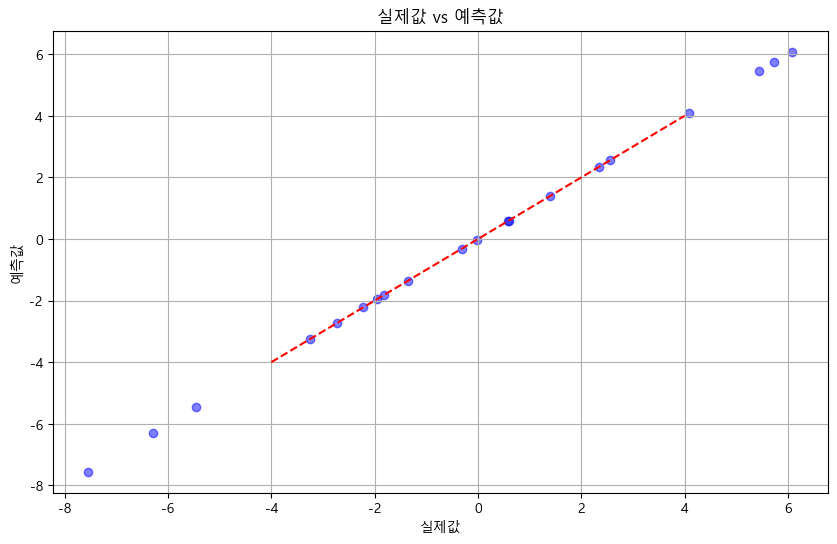

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 폰트지정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 부호 깨짐 지정
plt.rcParams['axes.unicode_minus'] = False

# 숫자가 지수표현식으로 나올 떄 지정
pd.options.display.float_format = '{:.2f}'.format

# 샘플 데이터 생성
np.random.seed(42)
n_samples = 100

# 독립변수 생성 (Y = 2X1 + 3X2 + 1.5X3 + 오차)
Y = 2 * X1 +3 * X2 + 1.5 * X3 + np.random.normal(0, 1, n_samples)

# 데이터프레임 생성
data = pd.DataFrame({
    'X1': X1,
    'X2': X2,
    'X3': X3,
    'Y': Y
})

# 학습용과 테스트용 데이터 분리
X = data[['X1', 'X2', 'X3']]
y = data['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 결과 출력
print("회귀 계수:")
for features, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"\n절편: {model.intercept_:.4f}")
print(f"\nR-squared값: {r2_score(y_test, y_pred):.4f}")
print(f"평균제곱근오차(RMSE): {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")

# 실제값과 예측값 비교 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([-4, 4], [-4, 4], 'r--') # 대각선
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.title('실제값 vs 예측값')
plt.grid(True)
plt.show()

In [1]:
### 선형회귀 추가학습 ###
## 사전학습(iloc 함수) ##

# 사전설치 : pip install pandas
import pandas as pd

data = {'col1': [10, 20, 30, 40],
        'col2': [100, 200, 300, 400],
        'col3': ['A','B','C','D']}

df = pd.DataFrame(data)

print(df) 


   col1  col2 col3
0    10   100    A
1    20   200    B
2    30   300    C
3    40   400    D


In [2]:
# 첫 번째 행 선택
print(df.iloc[0])

col1     10
col2    100
col3      A
Name: 0, dtype: object


In [3]:
# 두 번째 행, 첫 번째 열 선택
print(df.iloc[1, 0])  # 행 인덱스 1, 열 인덱스 0

20


In [4]:
# 첫 번째부터 세 번째 행까지, 처음 두 열 선택 (0, 1)
print(df.iloc[0:3, 0:2]) # 슬라이싱: 끝 인덱스(3, 2)는 포함 X

   col1  col2
0    10   100
1    20   200
2    30   300


In [5]:
## 사전 학습(loc 함수) ##

data = {'col1': [10, 20, 30, 40],
        'col2': [100, 200, 300, 400],
        'col3': ['A', 'B', 'C', 'D']}

In [6]:
df = pd.DataFrame(data, index=['a', 'b', 'c', 'd']) # 명시적인 인덱스 설정

In [7]:
# 인덱스 'a' 행 선택
print(df.loc['a'])

col1     10
col2    100
col3      A
Name: a, dtype: object


In [8]:
# 인덱스 'b' 행, 'col1' 열 선택
print(df.loc['b', 'col1'])

20


In [9]:
# 인덱스 'a'부터 'c'까지 행, 'col1'과 'col2' 열 선택
print(df.loc['a':'c', 'col1':'col2']) # 슬라이싱: 끝 인덱스('c', 'col2') 포함

   col1  col2
a    10   100
b    20   200
c    30   300


In [10]:
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('./dataset/LinearRegressionData.csv')
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

X,y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100]))

In [13]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [14]:
y_pred = reg.predict(X)
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

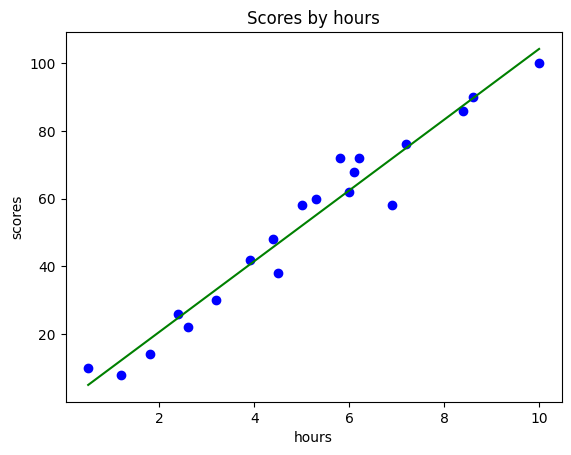

In [19]:
plt.scatter(X,y, color='blue')
plt.plot(X, y_pred, color = 'green')
plt.title('Scores by hours')
plt.xlabel('hours')
plt.ylabel('scores')
plt.show()

In [20]:
print(' 9 시간 공부 시 예상점수 : ', reg.predict([[9]]))

 9 시간 공부 시 예상점수 :  [93.77478776]


In [22]:
reg.coef_

array([10.44369694])

In [24]:
reg.intercept_

np.float64(-0.218484702867201)